In [27]:

# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import random



## 데이터 준비

In [28]:
# 데이터셋 준비
(X_train_all, y_train_all), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터셋 크기 확인
print(X_train_all.shape, y_train_all.shape)
# 3차원 배열 60000개

print(X_test.shape)

print(X_train_all[0].shape)

(60000, 28, 28) (60000,)
(10000, 28, 28)
(28, 28)


In [29]:
# 숫자 레이블을 실제 레이블과 연결하여 확인
# 숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0 : 'T-shirt/top', 
                 1 : 'Trouser', 
                 2: 'Pullover', 
                 3: 'Dress', 
                 4: 'Coat', 
                 5: 'Sandal', 
                 6: 'Shirt', 
                 7: 'Sneaker', 
                 8: 'Bag', 
                 9: 'Ankle boot'}
print(y_train_all[0])
print(target_values[y_train_all[0]])

9
Ankle boot


   0   0   0   0   0   0   0   0   0  40   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 213 250 196  47  17   2   4   8 181 236 204   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 189 236 238 254 246 255 255 241 240 226 243  35   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 228 235 221 225 234 215 227 227 225 224 246  71   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 252 232 226 226 222 232 225 225 233 227 245 146   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 255 227 228 226 227 226 226 238 229 220 241 224   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   3 255 226 227 228 228 228 232 226 137 130 216 255   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  22 255 227 228 227 226 226 235 217 139 130 210 235   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  59 255 226 230 229 229 229 229 242 212 207 233 237  13   0   0   0

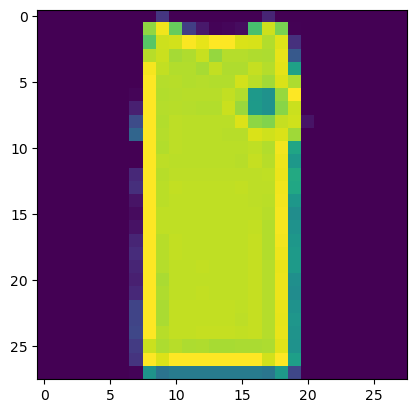

In [30]:
closet = X_test[499]
for i in range(28):
    for j in range(28):
        print(f'{closet[i][j]:4d}', end='')
    print()
plt.imshow(closet);

In [31]:
print(target_values[y_test[499]])

T-shirt/top


## 데이터 분할, 차원 변경, 정규화

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all,
stratify=y_train_all, test_size=0.2, random_state=42)

X_train = X_train[..., tf.newaxis]
# X_train = np.expand_dims(X_train, axis=-1)도 동일
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
X_train.shape

(48000, 28, 28, 1)

## CNN Ver.1 - Basic CNN

In [33]:
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense

model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3, 3),
activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [34]:
hist1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=2,
batch_size=64)

Epoch 1/20
750/750 - 6s - loss: 1.1960 - acc: 0.8075 - val_loss: 0.4032 - val_acc: 0.8656 - 6s/epoch - 8ms/step
Epoch 2/20
750/750 - 6s - loss: 0.3562 - acc: 0.8779 - val_loss: 0.3589 - val_acc: 0.8782 - 6s/epoch - 7ms/step
Epoch 3/20
750/750 - 6s - loss: 0.2949 - acc: 0.8934 - val_loss: 0.3359 - val_acc: 0.8873 - 6s/epoch - 8ms/step
Epoch 4/20
750/750 - 6s - loss: 0.2584 - acc: 0.9051 - val_loss: 0.3285 - val_acc: 0.8917 - 6s/epoch - 8ms/step
Epoch 5/20
750/750 - 6s - loss: 0.2436 - acc: 0.9101 - val_loss: 0.3391 - val_acc: 0.8898 - 6s/epoch - 8ms/step
Epoch 6/20
750/750 - 6s - loss: 0.2249 - acc: 0.9152 - val_loss: 0.3497 - val_acc: 0.8873 - 6s/epoch - 8ms/step
Epoch 7/20
750/750 - 7s - loss: 0.2137 - acc: 0.9199 - val_loss: 0.3403 - val_acc: 0.8917 - 7s/epoch - 9ms/step
Epoch 8/20
750/750 - 6s - loss: 0.2041 - acc: 0.9235 - val_loss: 0.3323 - val_acc: 0.8969 - 6s/epoch - 9ms/step
Epoch 9/20
750/750 - 6s - loss: 0.1949 - acc: 0.9272 - val_loss: 0.3367 - val_acc: 0.8997 - 6s/epoch - 8

In [35]:
# 손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
        plt.figure(figsize=(5, 5))
        plt.plot(range(start, total_epoch + 1), 
                history.history['loss'][start-1:total_epoch], 
                label='Train')
        plt.plot(range(start, total_epoch + 1), 
                history.history['val_loss'][start-1:total_epoch], 
                label='Validation')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# 정확도 그래프
def plot_acc_curve(history, total_epoch=10, start=1):
        plt.figure(figsize=(5, 5))
        plt.plot(range(start, total_epoch + 1), 
                history.history['acc'][start-1:total_epoch], 
                label='Train',c='b')
        plt.plot(range(start, total_epoch + 1), 
                history.history['val_acc'][start-1:total_epoch], 
                label='Validation', c='r', ls='--')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


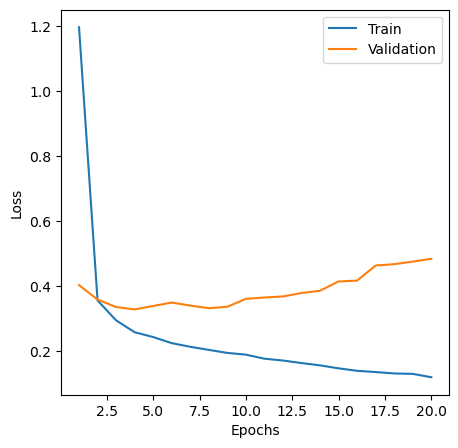

In [36]:
plot_loss_curve(hist1, 20, 1)


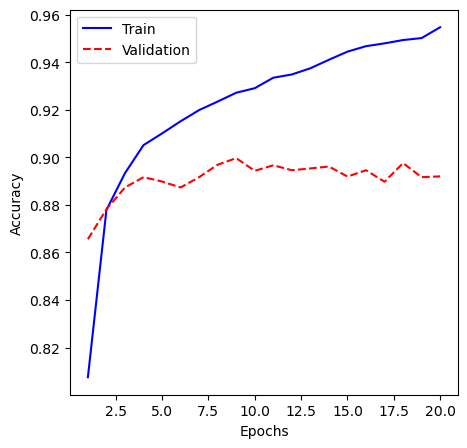

In [37]:
plot_acc_curve(hist1, 20, 1)

## CNN Ver.2 - DropOut 레이어 및 Early Stopping Call Back

###  DropOut 레이어 추가


In [38]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3, 3),
activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                      

### EarlyStopping 적용

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_loss', patience=10)
hist2 = model2.fit(X_train, y_train, batch_size=64, epochs=100,\
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose=2)

Epoch 1/100
750/750 - 7s - loss: 2.2741 - acc: 0.3111 - val_loss: 1.4303 - val_acc: 0.4793 - 7s/epoch - 9ms/step
Epoch 2/100
750/750 - 6s - loss: 1.5963 - acc: 0.3971 - val_loss: 0.9084 - val_acc: 0.6954 - 6s/epoch - 8ms/step
Epoch 3/100
750/750 - 6s - loss: 1.3249 - acc: 0.4997 - val_loss: 0.6274 - val_acc: 0.7512 - 6s/epoch - 8ms/step
Epoch 4/100
750/750 - 6s - loss: 0.9716 - acc: 0.6127 - val_loss: 0.5287 - val_acc: 0.7950 - 6s/epoch - 8ms/step
Epoch 5/100
750/750 - 6s - loss: 0.8231 - acc: 0.6658 - val_loss: 0.4763 - val_acc: 0.8224 - 6s/epoch - 8ms/step
Epoch 6/100
750/750 - 6s - loss: 0.7003 - acc: 0.7273 - val_loss: 0.4232 - val_acc: 0.8476 - 6s/epoch - 8ms/step
Epoch 7/100
750/750 - 6s - loss: 0.6253 - acc: 0.7548 - val_loss: 0.3935 - val_acc: 0.8741 - 6s/epoch - 8ms/step
Epoch 8/100
750/750 - 6s - loss: 0.5613 - acc: 0.7762 - val_loss: 0.3706 - val_acc: 0.8774 - 6s/epoch - 8ms/step
Epoch 9/100
750/750 - 6s - loss: 0.5200 - acc: 0.7922 - val_loss: 0.3572 - val_acc: 0.8832 - 6s/

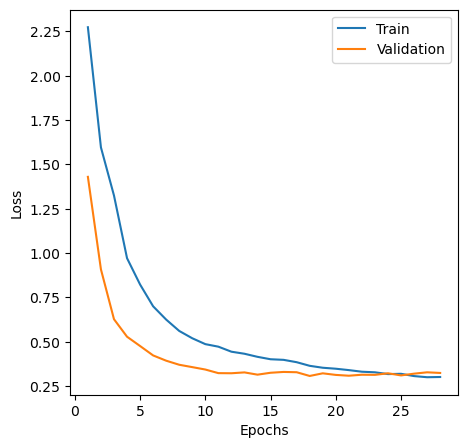

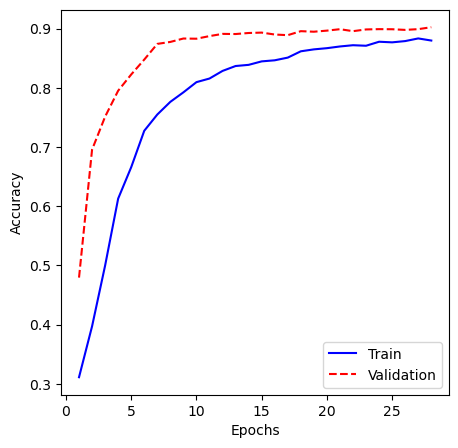

In [40]:
plot_loss_curve(hist2, len(hist2.history['loss']), 1)
plot_acc_curve(hist2, len(hist2.history['loss']), 1)

In [54]:
comp_df = pd.DataFrame()
comp_df = pd.concat([pd.DataFrame(hist1.history), pd.DataFrame(hist2.history)], axis= 1)

In [41]:
pd.DataFrame(hist2.history)

,loss,acc,val_loss,val_acc
0,2.274116,0.311063,1.430293,0.479333
1,1.596301,0.397063,0.908438,0.695417
2,1.324916,0.499687,0.627448,0.751167
3,0.971574,0.612750,0.528724,0.795000
4,0.823117,0.665812,0.476270,0.822417
5,0.700253,0.727333,0.423174,0.847583
6,0.625265,0.754792,0.393505,0.874083
7,0.561284,0.776208,0.370565,0.877417
8,0.519989,0.792250,0.357237,0.883167
9,0.486892,0.809479,0.343681,0.882833


In [42]:
len(hist2.history['loss'])

28

### CNN Ver.3 - 사용자 정의 콜백, ModelCheckPoint, load_model

In [51]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_acc') > 0.91):
            self.model.stop_training =True
            print('\n')
            print(f"목표 정확도 달성 : 검증 정확도 {logs.get('val_acc'):.4f}")

my_callback = my_callback()

In [52]:
# Best model 저장법

from tensorflow.keras.callbacks import ModelCheckpoint
import os

best_model_path = os.getcwd() + 'best_mnist_cnn_model.h5'
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, save_weights_only=False)

# CNN 모델 학습

model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=(3, 3),
activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(units=64, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
# model.summary()

In [53]:
hist3 = model3.fit(X_train, y_train, batch_size=64, epochs=100, \
    validation_data=(X_val, y_val), callbacks=[my_callback, earlystopper, save_best_model],
    verbose=2)

Epoch 1/100
750/750 - 7s - loss: 2.3573 - acc: 0.2138 - val_loss: 1.4137 - val_acc: 0.3991 - 7s/epoch - 9ms/step
Epoch 2/100
750/750 - 6s - loss: 1.6998 - acc: 0.3352 - val_loss: 1.2186 - val_acc: 0.5518 - 6s/epoch - 8ms/step
Epoch 3/100
750/750 - 6s - loss: 1.5450 - acc: 0.3935 - val_loss: 0.8992 - val_acc: 0.6812 - 6s/epoch - 8ms/step
Epoch 4/100
750/750 - 6s - loss: 1.1645 - acc: 0.5565 - val_loss: 0.6965 - val_acc: 0.7498 - 6s/epoch - 8ms/step
Epoch 5/100
750/750 - 6s - loss: 0.8807 - acc: 0.6555 - val_loss: 0.5568 - val_acc: 0.7908 - 6s/epoch - 8ms/step
Epoch 6/100
750/750 - 6s - loss: 0.7651 - acc: 0.6945 - val_loss: 0.5166 - val_acc: 0.7824 - 6s/epoch - 8ms/step
Epoch 7/100
750/750 - 6s - loss: 0.6902 - acc: 0.7186 - val_loss: 0.4601 - val_acc: 0.8057 - 6s/epoch - 8ms/step
Epoch 8/100
750/750 - 6s - loss: 0.6166 - acc: 0.7447 - val_loss: 0.4350 - val_acc: 0.8409 - 6s/epoch - 8ms/step
Epoch 9/100
750/750 - 6s - loss: 0.5788 - acc: 0.7673 - val_loss: 0.4164 - val_acc: 0.8577 - 6s/

In [55]:
comp_df = pd.concat([comp_df, pd.DataFrame(hist3.history)], axis=1)

In [56]:
comp_df

,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc
0,1.195966,0.807500,0.403233,0.865583,2.274116,0.311063,1.430293,0.479333,2.357269,0.213833,1.413730,0.399083
1,0.356200,0.877854,0.358942,0.878167,1.596301,0.397063,0.908438,0.695417,1.699757,0.335208,1.218615,0.551833
2,0.294912,0.893354,0.335853,0.887333,1.324916,0.499687,0.627448,0.751167,1.544993,0.393542,0.899159,0.681167
3,0.258412,0.905146,0.328513,0.891667,0.971574,0.612750,0.528724,0.795000,1.164468,0.556479,0.696505,0.749833
4,0.243557,0.910062,0.339079,0.889833,0.823117,0.665812,0.476270,0.822417,0.880696,0.655458,0.556785,0.790750
5,0.224892,0.915187,0.349666,0.887333,0.700253,0.727333,0.423174,0.847583,0.765064,0.694521,0.516644,0.782417
6,0.213702,0.919896,0.340315,0.891667,0.625265,0.754792,0.393505,0.874083,0.690243,0.718583,0.460071,0.805667
7,0.204142,0.923479,0.332337,0.896917,0.561284,0.776208,0.370565,0.877417,0.616624,0.744667,0.435045,0.840917
8,0.194878,0.927188,0.336741,0.899667,0.519989,0.792250,0.357237,0.883167,0.578791,0.767333,0.416434,0.857667
9,0.189575,0.929104,0.361007,0.894333,0.486892,0.809479,0.343681,0.882833,0.546861,0.781542,0.394083,0.861583


In [58]:
from keras.models import load_model

h5_loaded = load_model('best_mnist_cnn_model.h5')
h5_loaded.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_jewoos (Conv2D)        (None, 26, 26, 32)        320       
                                                                 
 pool_jewoos (MaxPooling2D)  (None, 13, 13, 32)        0         
                                                                 
 flatten_13 (Flatten)        (None, 5408)              0         
                                                                 
 dense_100 (Dense)           (None, 1000)              5409000   
                                                                 
 activation_95 (Activation)  (None, 1000)              0         
                                                                 
 dropout_77 (Dropout)        (None, 1000)              0         
                                                                 
 dense_101 (Dense)           (None, 700)             